In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read a CSV file into a DataFrame
combined_All_batch = pd.read_csv('../combined_and_clean_data/combined_All_batch_participants.csv')



 Identification of underserved groups or gaps in participation that need attention.3 .

      GED -ID              Name  Age  Gender  Location  \
0  GED2024001   Aung Khant Hein   22    Male  Mandalay   
1  GED2024002     Khant Nyi Zin   16    Male  Mandalay   
2  GED2024003    Shwe Yee Phyoe   19  Female   Sagaing   
3  GED2024004  Myat Ko Ko Khant   15    Male   Sagaing   
4  GED2024006    Kyal Sin Thwel   16  Female    Yangon   

            Highest Education Specilization in High School  \
0  Pass University First Year               အတွဲ(၇) ဇီဝဗေဒ   
1              Pass 7th Grade               Not applicable   
2             Pass 10th Grade                    သိပ္ပံတွဲ   
3              Pass 7th Grade                      unknown   
4              Pass 8th Grade                        အီကို   

                                  Current Job/School   Eng  Math  ...  \
0                                            student  23.0  26.0  ...   
1                                     Not applicable  39.0  38.0  ...   
2  English Class တက်နေပြီး Dream Education မှာ Vo...  37.0 

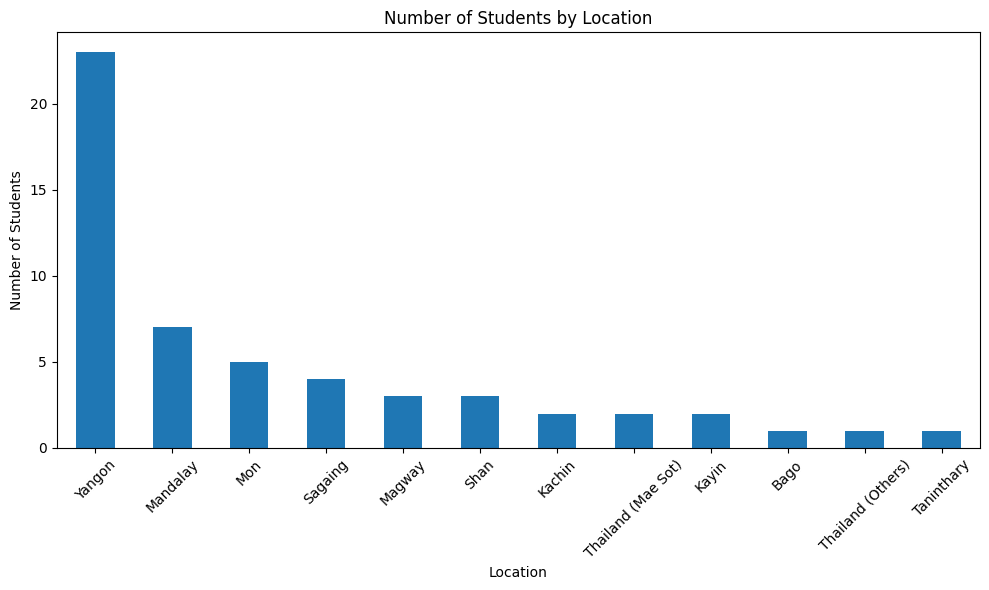

In [2]:
print(combined_All_batch.head())

# Count the number of students in each location
location_counts = combined_All_batch['Location'].value_counts()

# Display the counts
print(location_counts)


# Optional: Visualize the distribution of students by location
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar')
plt.title('Number of Students by Location')
plt.xlabel('Location')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


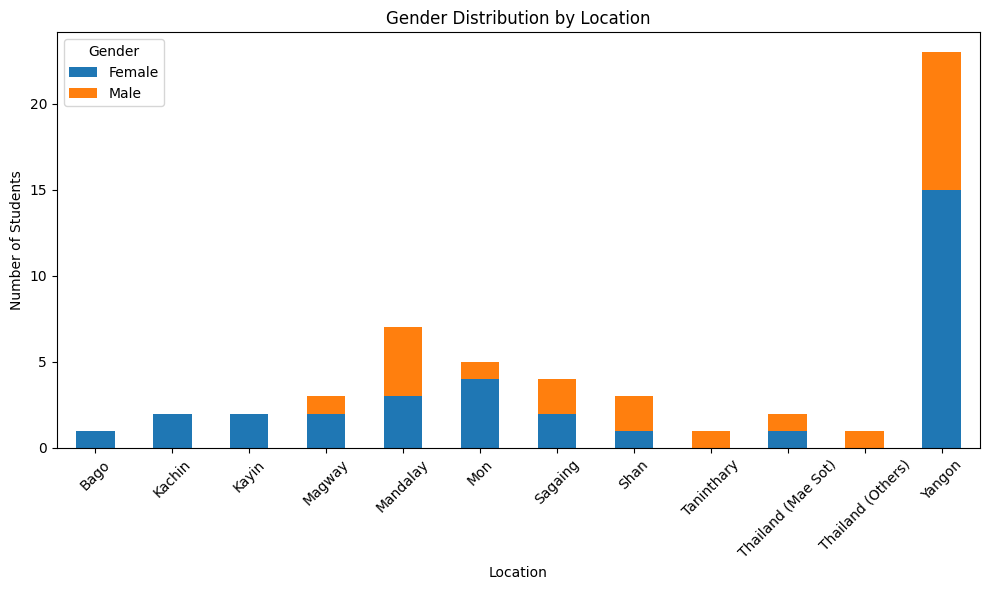

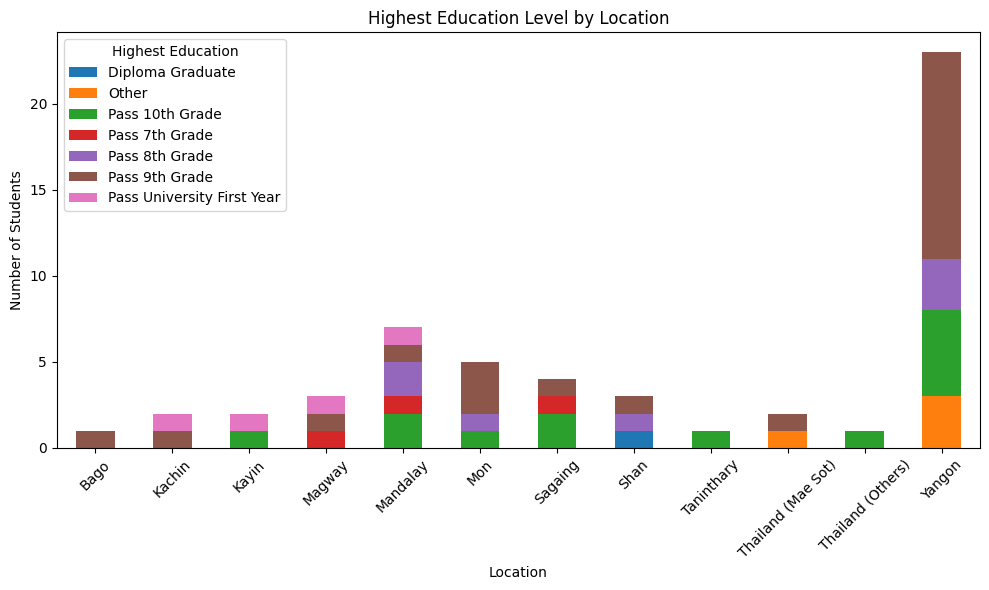

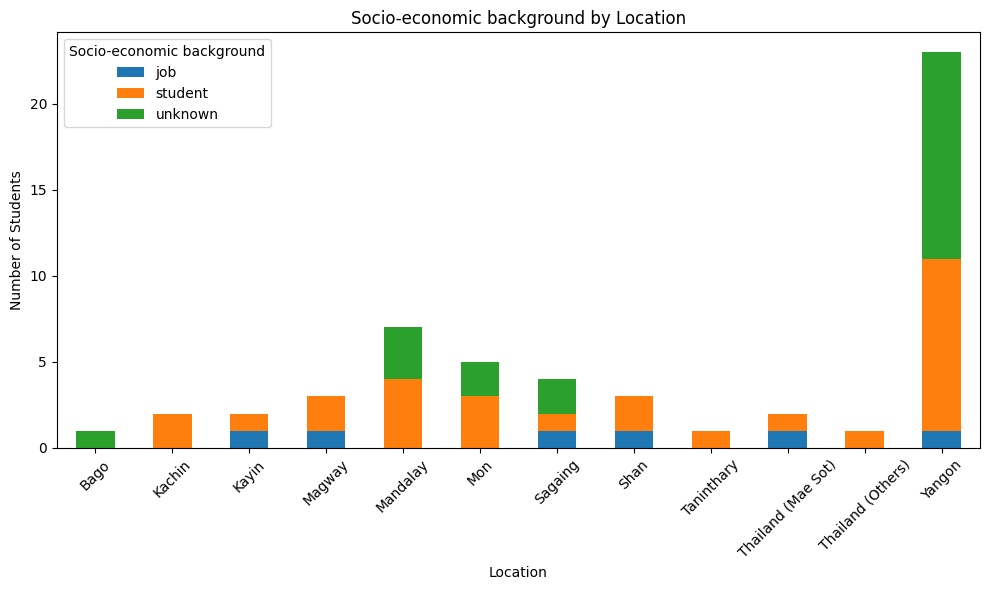

In [9]:

# 1. Gender Distribution by Location
gender_location = combined_All_batch.groupby(['Location', 'Gender']).size().unstack()
gender_location.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# 2. Highest Education Level by Location
education_location = combined_All_batch.groupby(['Location', 'Highest Education']).size().unstack()
education_location.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Highest Education Level by Location')
plt.xlabel('Location')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Highest Education')
plt.tight_layout()
plt.show()

# 3. Socio-economic background Analysis
job_location = combined_All_batch.groupby(['Location', 'Socio-economic background']).size().unstack()
job_location.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Socio-economic background by Location')
plt.xlabel('Location')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.legend(title='Socio-economic background')
plt.tight_layout()
plt.show()


Acceptance rate of from batch 1 and batch 2


Aggregated Acceptance by Location:
              Location  Total Applicants  Total Accepted  Acceptance Rate (%)
0           Ayeyarwady                 2             0.0             0.000000
2                 Chin                 1             0.0             0.000000
9              Rakhine                 1             0.0             0.000000
8               Others                10             0.0             0.000000
1                 Bago                 6             1.0            16.666667
14   Thailand (Others)                 4             1.0            25.000000
12          Taninthary                 4             1.0            25.000000
4                Kayin                 7             2.0            28.571429
6             Mandalay                22             7.0            31.818182
11                Shan                 8             3.0            37.500000
3               Kachin                 5             2.0            40.000000
10             Sagaing      

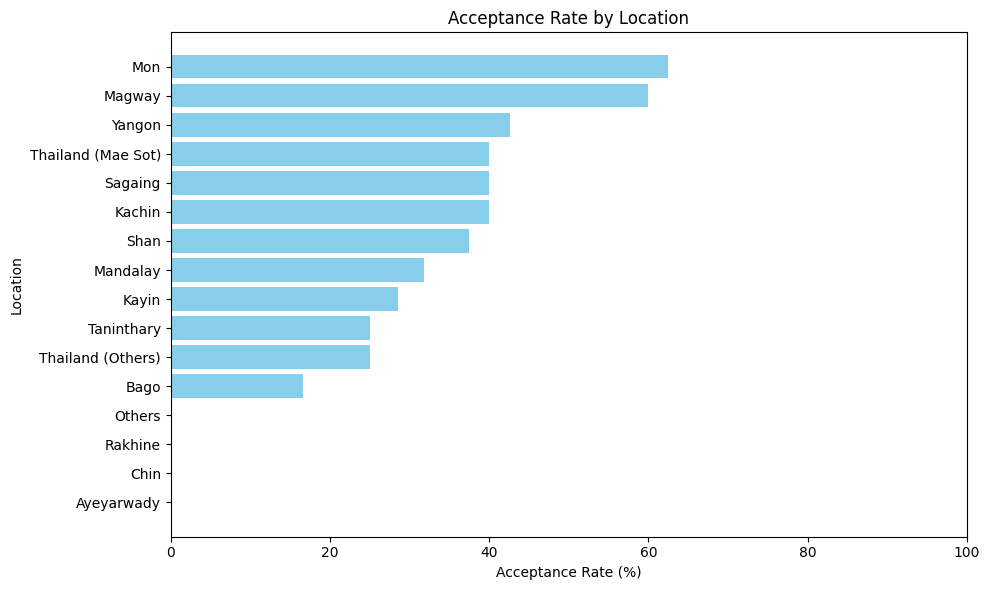

In [3]:

import pickle  #Getting dataframe from another notebook
# Load the first DataFrame
with open('acceptance_summary.pkl', 'rb') as f:
    acceptance_summary = pickle.load(f)

# Load the second DataFrame
with open('acceptance_summary2.pkl', 'rb') as f:
    acceptance_summary2 = pickle.load(f)

# Combine DataFrames
combined_df = pd.concat([acceptance_summary, acceptance_summary2], ignore_index=True)

# Aggregate counts of students accepted by location
location_counts = combined_df.groupby('Location').agg({'Total Applicants': 'sum', 'Total Accepted': 'sum'}).reset_index()

# Calculate acceptance rate
location_counts['Acceptance Rate (%)'] = (location_counts['Total Accepted'] / location_counts['Total Applicants']) * 100

# Sort by acceptance rate in ascending order
location_counts = location_counts.sort_values(by='Acceptance Rate (%)')

# Display the aggregated results
print("\nAggregated Acceptance by Location:")
print(location_counts)

# Create a Graph
plt.figure(figsize=(10, 6))
plt.barh(location_counts['Location'], location_counts['Acceptance Rate (%)'], color='skyblue')
plt.title('Acceptance Rate by Location')
plt.xlabel('Acceptance Rate (%)')
plt.ylabel('Location')
plt.xlim(0, 100)  # Set x-axis limit from 0 to 100%
plt.tight_layout()
plt.show()


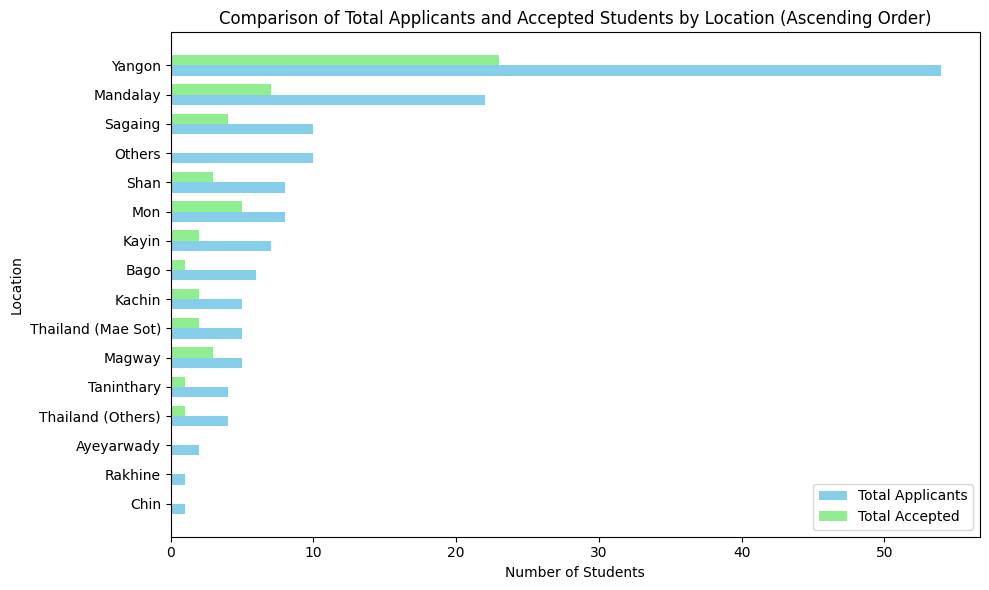

In [7]:
# Sort the data by Total Applicants in ascending order
location_counts_sorted = location_counts.sort_values(by='Total Applicants')

# Extract sorted data
locations = location_counts_sorted['Location']
total_applicants = location_counts_sorted['Total Applicants']
total_accepted = location_counts_sorted['Total Accepted']

# Set the bar width
bar_height = 0.35

# Set the positions of the bars on the y-axis
y = np.arange(len(locations))

# Plot the side-by-side horizontal bars
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.barh(y - bar_height / 2, total_applicants, bar_height, label='Total Applicants', color='skyblue')
bars2 = ax.barh(y + bar_height / 2, total_accepted, bar_height, label='Total Accepted', color='lightgreen')

# Add labels, title, and custom y-axis tick labels
ax.set_ylabel('Location')
ax.set_xlabel('Number of Students')
ax.set_title('Comparison of Total Applicants and Accepted Students by Location (Ascending Order)')
ax.set_yticks(y)
ax.set_yticklabels(locations)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [14]:
# Calculate acceptance rates
location_counts['Acceptance Rate'] = (location_counts['Total Accepted'] / location_counts['Total Applicants']) * 100

# Calculate the average acceptance rate and standard deviation
average_acceptance_rate = location_counts['Acceptance Rate'].mean()
std_acceptance_rate = location_counts['Acceptance Rate'].std()

# Display results
print("Average Acceptance Rate across all locations: {:.2f}%".format(average_acceptance_rate))
print("Standard Deviation of Acceptance Rates: {:.2f}%".format(std_acceptance_rate))

# Assess fairness
threshold = average_acceptance_rate + std_acceptance_rate
favoritism_locations = location_counts[location_counts['Acceptance Rate'] > threshold]
fair_locations = location_counts[location_counts['Acceptance Rate'] <= threshold]

print("\nLocations with significantly higher acceptance rates (potential favoritism):")
print(favoritism_locations[['Location', 'Acceptance Rate']])

print("\nLocations with acceptance rates within the fair range:")
print(fair_locations[['Location', 'Acceptance Rate']])


Average Acceptance Rate across all locations: 28.10%
Standard Deviation of Acceptance Rates: 20.41%

Locations with significantly higher acceptance rates (potential favoritism):
  Location  Acceptance Rate
5   Magway             60.0
7      Mon             62.5

Locations with acceptance rates within the fair range:
              Location  Acceptance Rate
0           Ayeyarwady         0.000000
2                 Chin         0.000000
9              Rakhine         0.000000
8               Others         0.000000
1                 Bago        16.666667
14   Thailand (Others)        25.000000
12          Taninthary        25.000000
4                Kayin        28.571429
6             Mandalay        31.818182
11                Shan        37.500000
3               Kachin        40.000000
10             Sagaing        40.000000
13  Thailand (Mae Sot)        40.000000
15              Yangon        42.592593


In [15]:
# Calculate the mean and standard deviation for acceptance rates and total applicants
avg_acceptance_rate = location_counts['Acceptance Rate'].mean()
std_acceptance_rate = location_counts['Acceptance Rate'].std()
avg_applicants = location_counts['Total Applicants'].mean()
std_applicants = location_counts['Total Applicants'].std()

# Define thresholds for underserved groups
low_acceptance_threshold = avg_acceptance_rate - std_acceptance_rate
low_applicants_threshold = avg_applicants - std_applicants

# Identify underserved locations based on low acceptance rates and low applicants
underserved_acceptance = location_counts[location_counts['Acceptance Rate'] < low_acceptance_threshold]
underserved_applicants = location_counts[location_counts['Total Applicants'] < low_applicants_threshold]

print("Underserved Locations by Low Acceptance Rates:")
print(underserved_acceptance[['Location', 'Total Applicants', 'Total Accepted', 'Acceptance Rate']])

print("\nUnderserved Locations by Low Applicant Numbers:")
print(underserved_applicants[['Location', 'Total Applicants', 'Total Accepted', 'Acceptance Rate']])


Underserved Locations by Low Acceptance Rates:
     Location  Total Applicants  Total Accepted  Acceptance Rate
0  Ayeyarwady                 2             0.0              0.0
2        Chin                 1             0.0              0.0
9     Rakhine                 1             0.0              0.0
8      Others                10             0.0              0.0

Underserved Locations by Low Applicant Numbers:
Empty DataFrame
Columns: [Location, Total Applicants, Total Accepted, Acceptance Rate]
Index: []
